In [1]:
import numpy as np 
import pandas as pd

# Data

## Reading Data

In [2]:
import pandas as pd
df = pd.read_csv('spotify_data.csv')

## Data Info

In [3]:
print(df.columns)
print(df.head())

Index(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity',
       'year', 'genre', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')
   Unnamed: 0    artist_name        track_name                track_id  \
0           0     Jason Mraz   I Won't Give Up  53QF56cjZA9RTuuMZDrSA6   
1           1     Jason Mraz  93 Million Miles  1s8tP3jP4GZcyHDsjvw218   
2           2  Joshua Hyslop  Do Not Let Me Go  7BRCa8MPiyuvr2VU3O9W0F   
3           3   Boyce Avenue          Fast Car  63wsZUhUZLlh1OsyrZq7sz   
4           4   Andrew Belle  Sky's Still Blue  6nXIYClvJAfi6ujLiKqEq8   

   popularity  year     genre  danceability  energy  key  loudness  mode  \
0          68  2012  acoustic         0.483   0.303    4   -10.058     1   
1          50  2012  acoustic         0.572   0.454    3   -10.286     1   
2          57  2012  

## Unique Artists

In [4]:
unique_artists = df['artist_name'].nunique()
print("Number of unique artists:", unique_artists)

Number of unique artists: 64158


## Average Popularity

In [5]:
average_popularity = df['popularity'].mean()
print("Average popularity:", average_popularity)

Average popularity: 18.38312277325387


## Most Popular Track

In [6]:
max_popularity = df['popularity'].max()
max_popularity_track = df[df['popularity'] == max_popularity][['track_name', 'artist_name']]
print("Max popularity track:")
print(max_popularity_track)

Max popularity track:
       track_name  artist_name
612503    Flowers  Miley Cyrus


# Visualization

## Popularity Distribution

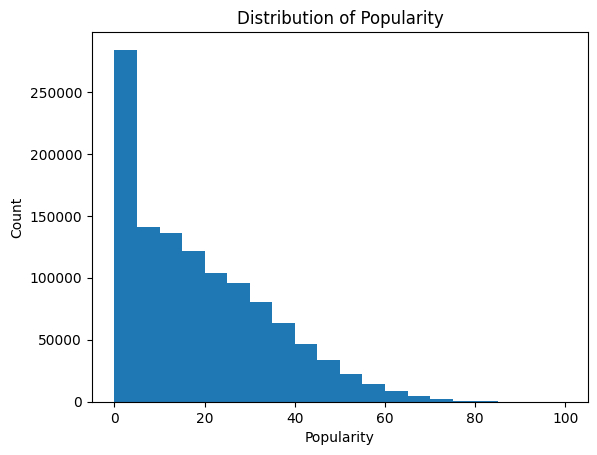

In [7]:
import matplotlib.pyplot as plt

plt.hist(df['popularity'], bins=20)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popularity')
plt.show()

In [8]:
genre_counts = df['genre'].value_counts()
print("Genre counts:")
print(genre_counts)

Genre counts:
genre
black-metal       21852
gospel            21621
ambient           21389
acoustic          21097
alt-rock          20918
                  ...  
chicago-house      5170
dubstep            4774
detroit-techno     3920
rock               3319
songwriter          589
Name: count, Length: 82, dtype: int64


In [9]:
average_danceability = df['danceability'].mean()
average_energy = df['energy'].mean()
print("Average danceability:", average_danceability)
print("Average energy:", average_energy)

Average danceability: 0.5374382319161484
Average energy: 0.6396698993142569


In [10]:
key_counts = df['key'].value_counts()
print("Key counts:")
print(key_counts)

Key counts:
key
7     139635
0     130081
2     123690
9     119293
1     112806
5      94032
4      91170
11     90955
6      76120
10     76038
8      70206
3      35738
Name: count, dtype: int64


## Genre Counts

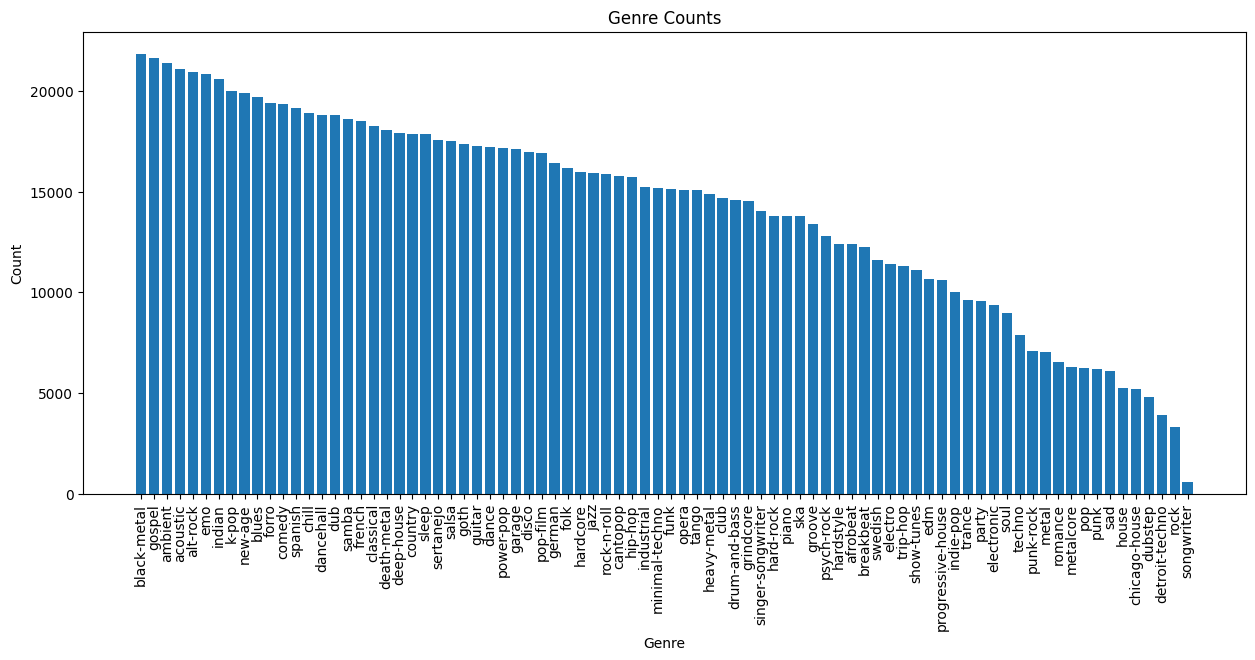

In [11]:
genre_counts = df['genre'].value_counts()
plt.figure(figsize=(15, 6))
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Counts')
plt.xticks(rotation=90)
plt.show()

## Distribution of Popularity

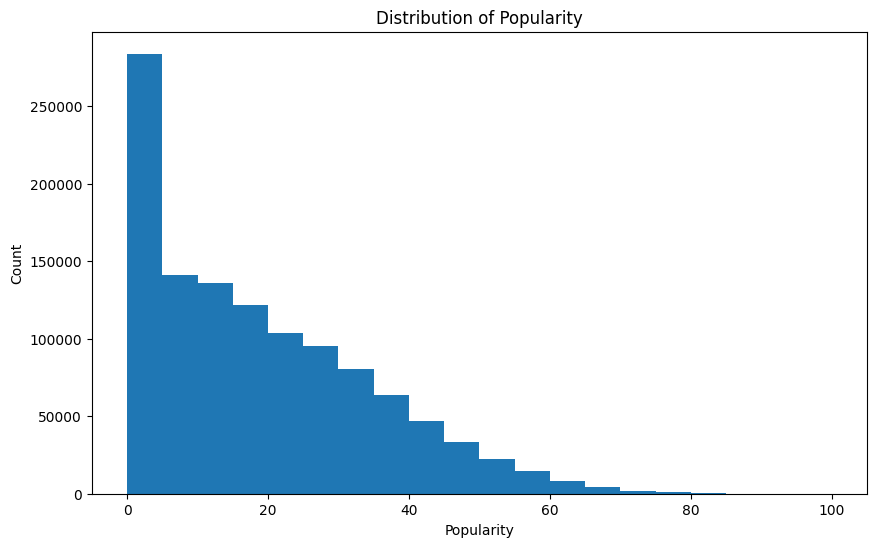

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(df['popularity'], bins=20)
plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('Distribution of Popularity')
plt.show()

## Danceability vs Energy

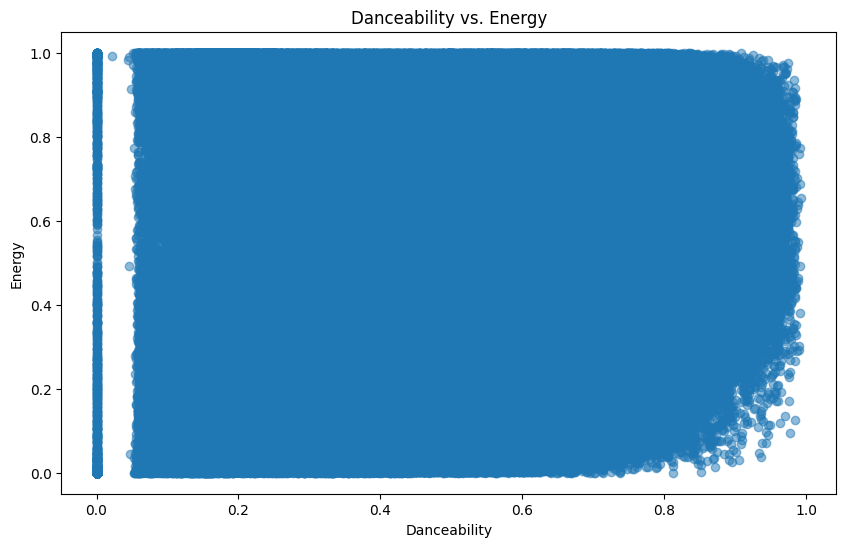

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(df['danceability'], df['energy'], alpha=0.5)
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title('Danceability vs. Energy')
plt.show()

## Key Counts

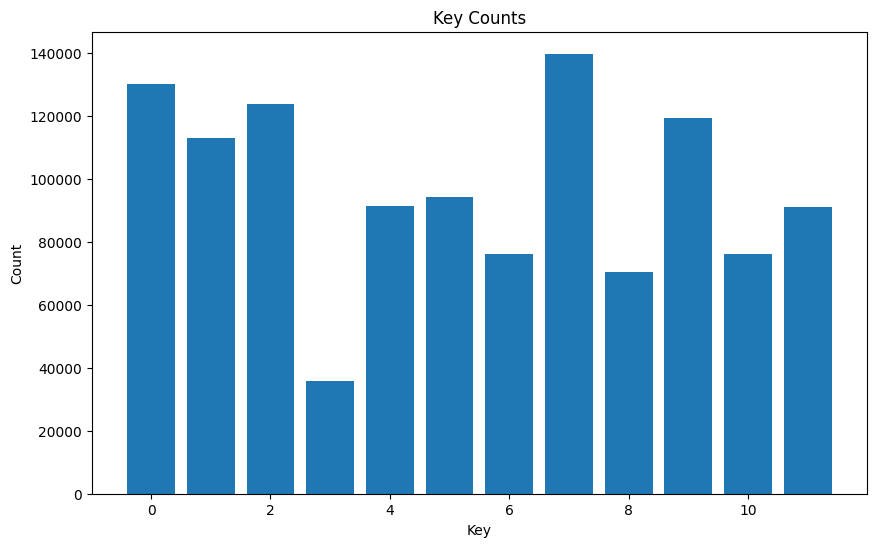

In [14]:
key_counts = df['key'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(key_counts.index, key_counts.values)
plt.xlabel('Key')
plt.ylabel('Count')
plt.title('Key Counts')
plt.show()

## Top Danceability by Genre

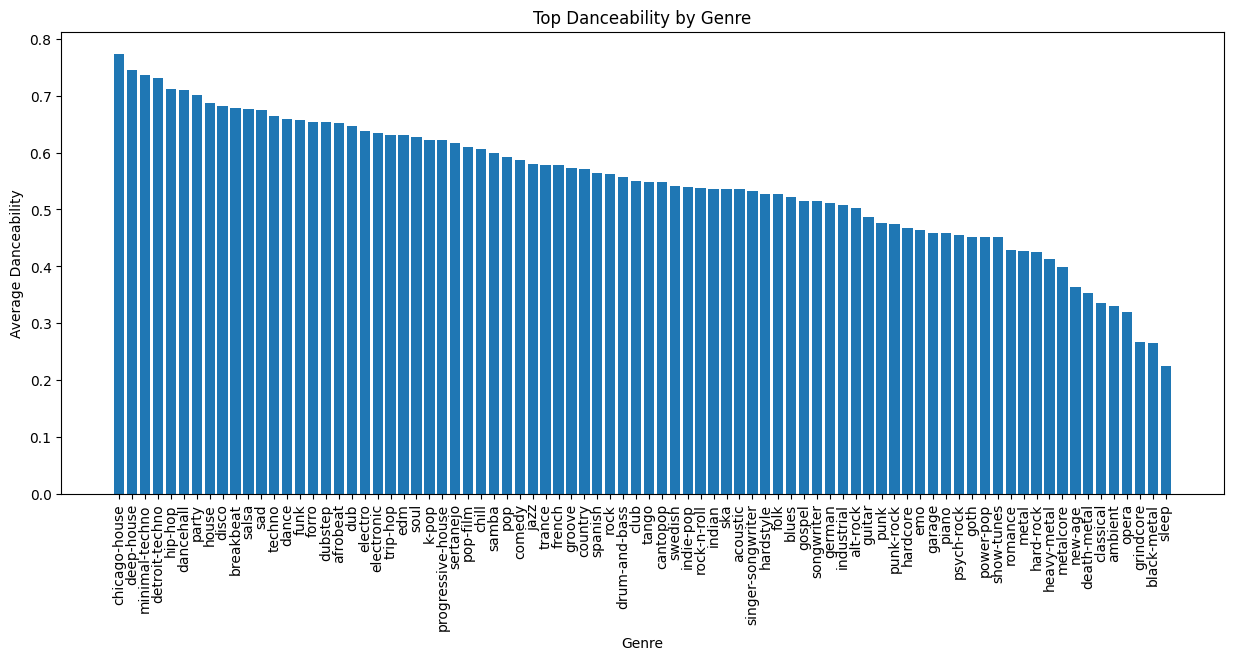

In [15]:
genre_danceability = df.groupby('genre')['danceability'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(genre_danceability.index, genre_danceability.values)
plt.xlabel('Genre')
plt.ylabel('Average Danceability')
plt.title('Top Danceability by Genre')
plt.xticks(rotation=90)
plt.show()

## Top Energy by Genre

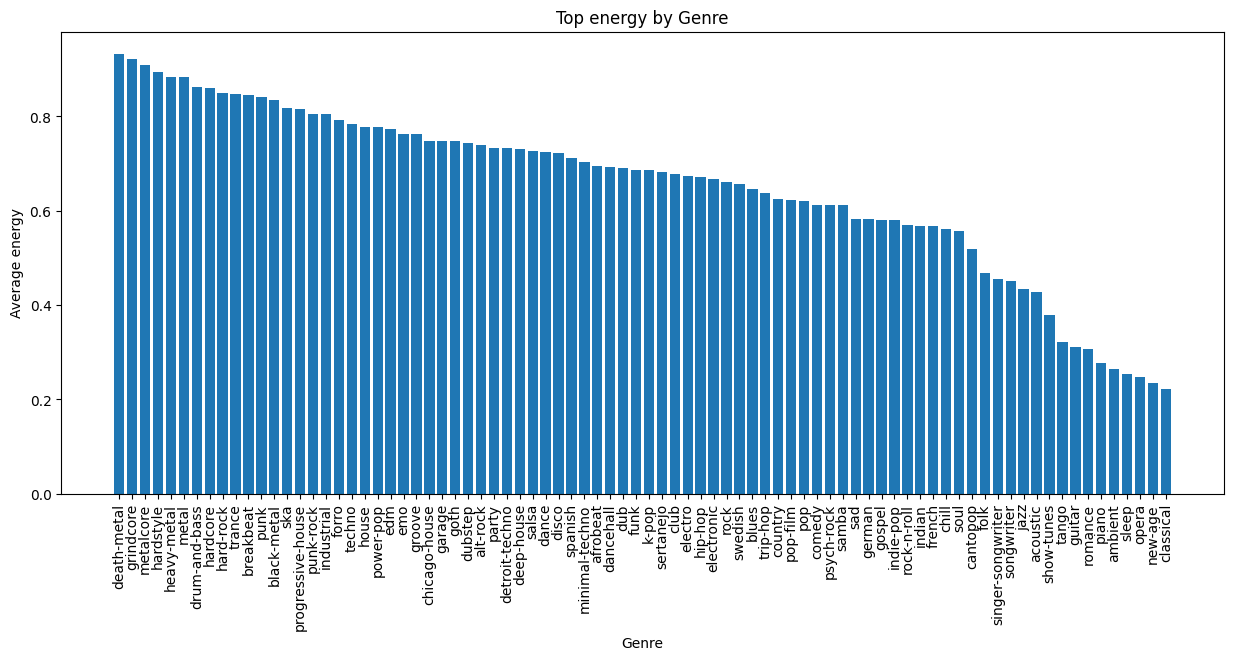

In [16]:
genre_danceability = df.groupby('genre')['energy'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
plt.bar(genre_danceability.index, genre_danceability.values)
plt.xlabel('Genre')
plt.ylabel('Average energy')
plt.title('Top energy by Genre')
plt.xticks(rotation=90)
plt.show()

# Clustering Using K Means

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [18]:
data = pd.read_csv('spotify_data.csv')

In [19]:
features = data[['danceability', 'energy', 'key']]

In [20]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [21]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

KMeans(n_clusters=3, random_state=42)

In [22]:
cluster_labels = kmeans.labels_

In [23]:
data['cluster'] = cluster_labels

## Clustered Genres

In [24]:
cluster_analysis = data.groupby('cluster')['genre'].unique()

for cluster, genres in cluster_analysis.items():
    print(f"Cluster {cluster}: {genres}")

Cluster 0: ['acoustic' 'afrobeat' 'alt-rock' 'ambient' 'black-metal' 'blues'
 'breakbeat' 'cantopop' 'chicago-house' 'chill' 'classical' 'club'
 'comedy' 'country' 'dance' 'dancehall' 'death-metal' 'deep-house'
 'detroit-techno' 'disco' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'guitar' 'hard-rock' 'hardcore'
 'hardstyle' 'heavy-metal' 'hip-hop' 'house' 'indian' 'indie-pop'
 'industrial' 'jazz' 'k-pop' 'metal' 'metalcore' 'minimal-techno'
 'new-age' 'opera' 'party' 'piano' 'pop' 'pop-film' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'rock' 'rock-n-roll'
 'romance' 'sad' 'salsa' 'samba' 'sertanejo' 'show-tunes'
 'singer-songwriter' 'ska' 'sleep' 'soul' 'spanish' 'swedish' 'tango'
 'techno' 'trance' 'trip-hop' 'songwriter']
Cluster 1: ['acoustic' 'afrobeat' 'alt-rock' 'ambient' 'black-metal' 'blues'
 'breakbeat' 'cantopop' 'chicago-house' 'chill' 'classica

# Top Listened Genres

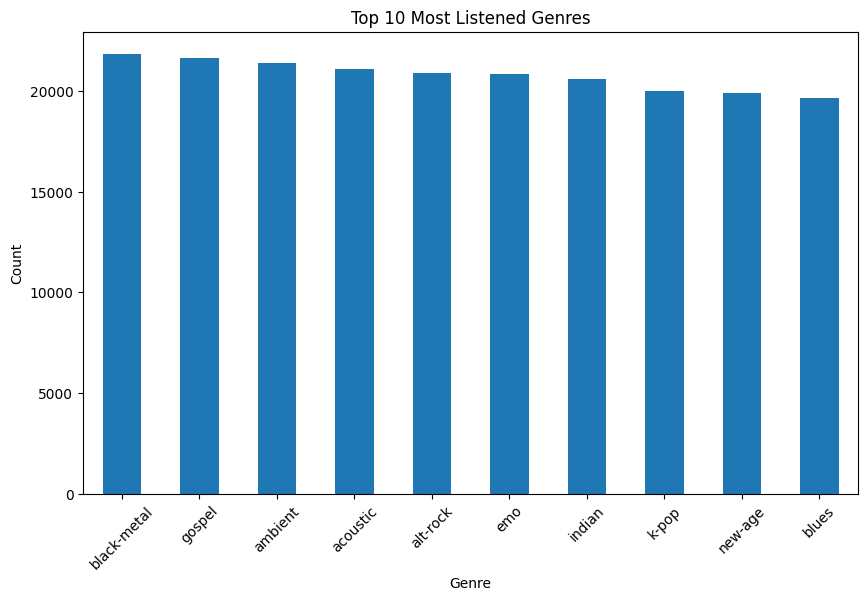

In [25]:
genre_counts = data['genre'].value_counts().head(10)

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Most Listened Genres')
plt.xticks(rotation=45)
plt.show()

## Top Least Listened Genres

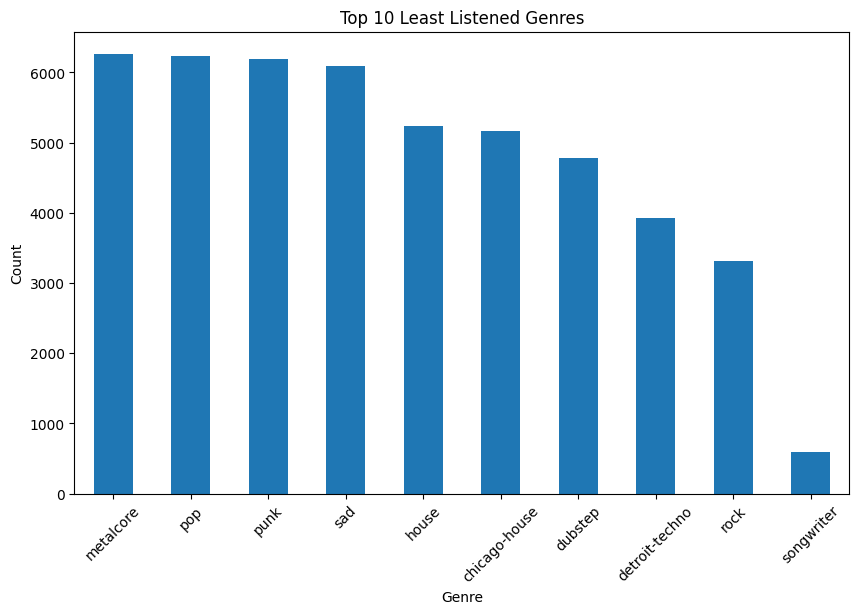

In [26]:
genre_counts = data['genre'].value_counts().tail(10)

plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Top 10 Least Listened Genres')
plt.xticks(rotation=45)
plt.show()

## Top Genres with both Energy and Danceability

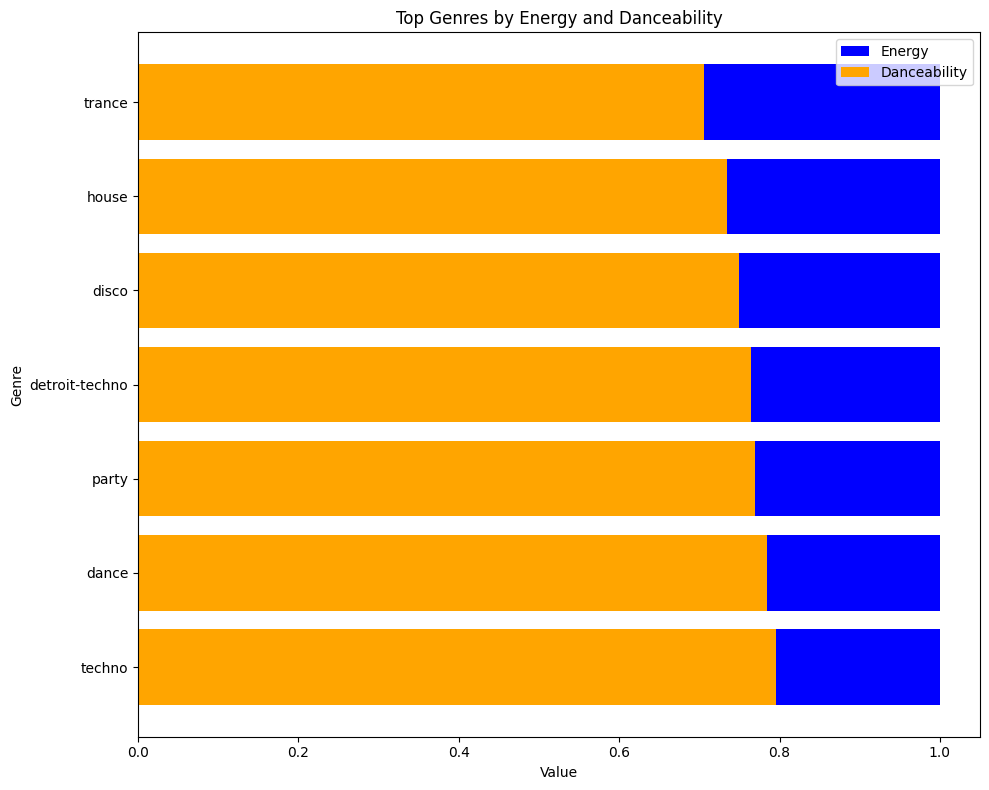

In [27]:
sorted_data = data.sort_values(by=['energy', 'danceability'], ascending=False)
top_20_data = sorted_data.head(20)

plt.figure(figsize=(10, 8))
plt.barh(top_20_data['genre'], top_20_data['energy'], color='blue', label='Energy')
plt.barh(top_20_data['genre'], top_20_data['danceability'], color='orange', label='Danceability')
plt.xlabel('Value')
plt.ylabel('Genre')
plt.title('Top Genres by Energy and Danceability')
plt.legend()
plt.tight_layout()
plt.show()

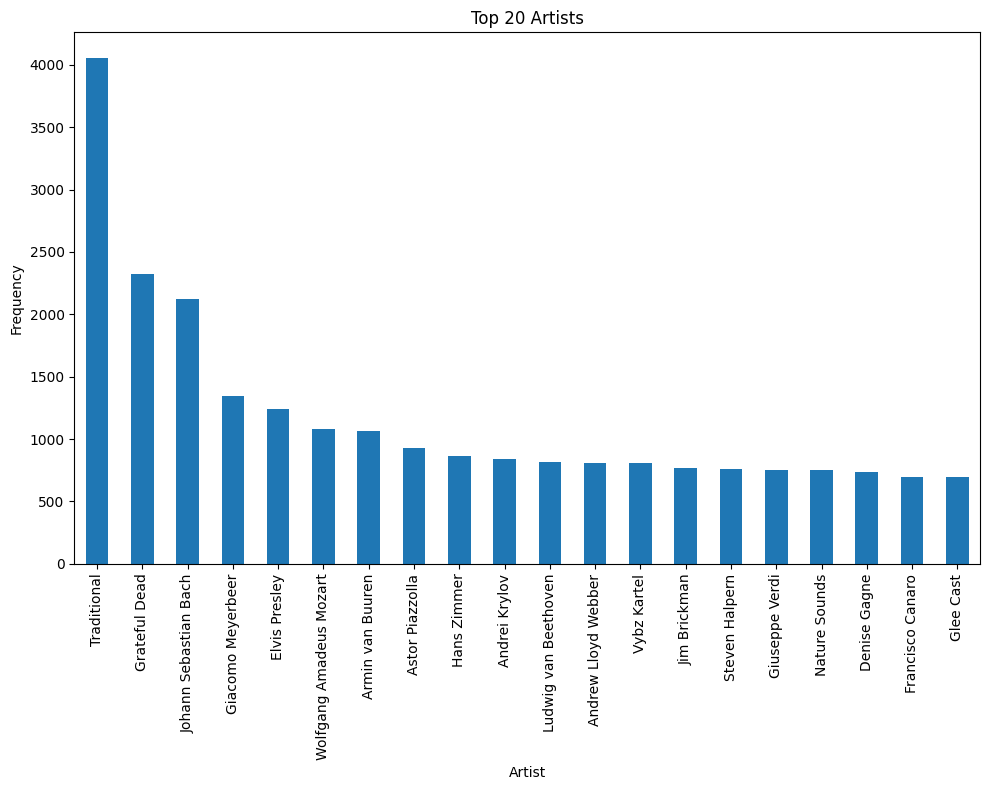

In [28]:
artist_counts = data['artist_name'].value_counts()

top_20_artists = artist_counts.head(20)

plt.figure(figsize=(10, 8))
top_20_artists.plot(kind='bar')
plt.xlabel('Artist')
plt.ylabel('Frequency')
plt.title('Top 20 Artists')
plt.tight_layout()
plt.show()

## Top Artist by genre

In [29]:
top_10_genres = data['genre'].value_counts().head(10).index

for genre in top_10_genres:
    print(f"Genre: {genre}")
    print("Top Artists:")
    genre_artist_counts = data[data['genre'] == genre]['artist_name'].value_counts()
    print(genre_artist_counts.head(2))
    print()

Genre: black-metal
Top Artists:
artist_name
Cradle Of Filth    247
Behemoth           188
Name: count, dtype: int64

Genre: gospel
Top Artists:
artist_name
Gaither Vocal Band    230
Israel & New Breed    209
Name: count, dtype: int64

Genre: ambient
Top Artists:
artist_name
Max Richter     519
Philip Glass    397
Name: count, dtype: int64

Genre: acoustic
Top Artists:
artist_name
Boyce Avenue    337
Frank Turner    235
Name: count, dtype: int64

Genre: alt-rock
Top Artists:
artist_name
Weezer             159
Hillsong UNITED    158
Name: count, dtype: int64

Genre: emo
Top Artists:
artist_name
New Found Glory    178
Fall Out Boy       162
Name: count, dtype: int64

Genre: indian
Top Artists:
artist_name
Pritam                   630
Nusrat Fateh Ali Khan    419
Name: count, dtype: int64

Genre: k-pop
Top Artists:
artist_name
BTS    245
BoA    237
Name: count, dtype: int64

Genre: new-age
Top Artists:
artist_name
Jim Brickman      766
Steven Halpern    710
Name: count, dtype: int64

Genre

## Top Songs by Tempo

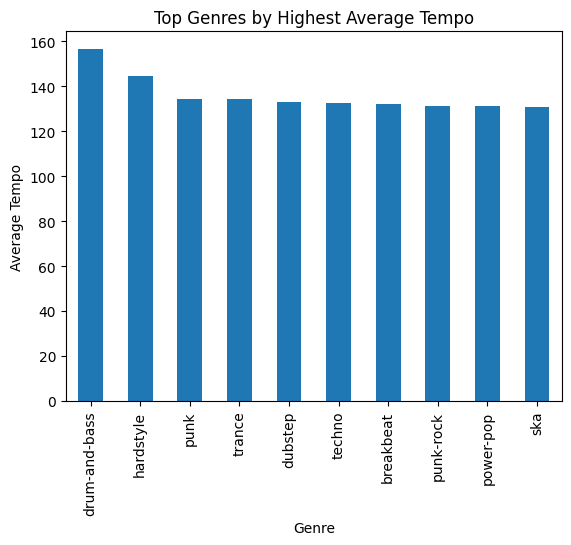

In [30]:
genre_avg_tempo = data.groupby('genre')['tempo'].mean()

top_genres = genre_avg_tempo.sort_values(ascending=False).head(10)

top_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Tempo')
plt.title('Top Genres by Highest Average Tempo')
plt.show()

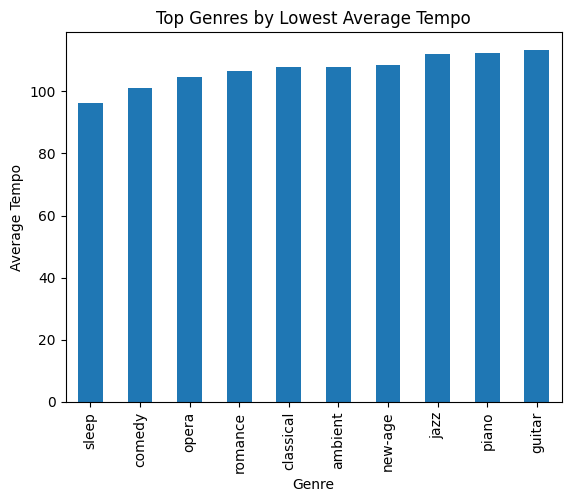

In [31]:
genre_avg_tempo = data.groupby('genre')['tempo'].mean()

top_genres = genre_avg_tempo.sort_values(ascending=True).head(10)

top_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Tempo')
plt.title('Top Genres by Lowest Average Tempo')
plt.show()

## Songs by Instrumentalness

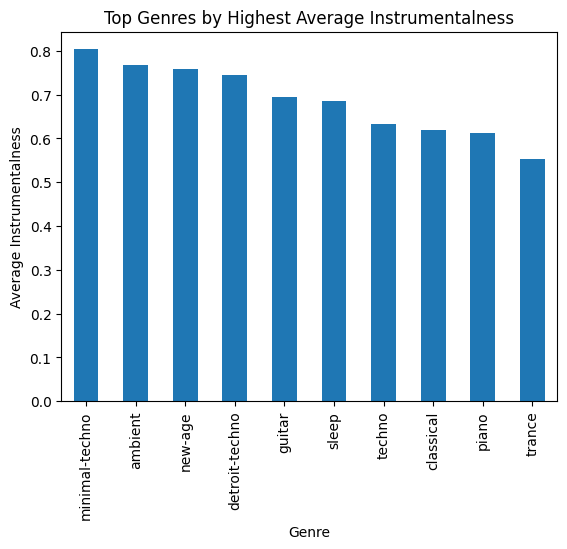

In [32]:
genre_avg_instrumentalness = data.groupby('genre')['instrumentalness'].mean()

top_genres = genre_avg_instrumentalness.sort_values(ascending=False).head(10)

top_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Instrumentalness')
plt.title('Top Genres by Highest Average Instrumentalness')
plt.show()

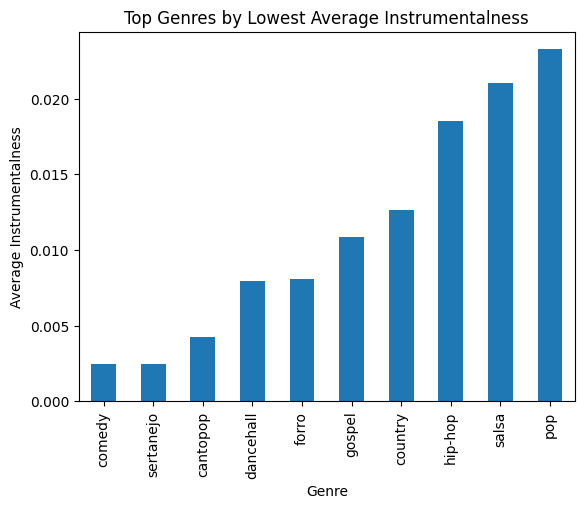

In [33]:
genre_avg_instrumentalness = data.groupby('genre')['instrumentalness'].mean()

top_genres = genre_avg_instrumentalness.sort_values(ascending=True).head(10)

top_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Instrumentalness')
plt.title('Top Genres by Lowest Average Instrumentalness')
plt.show()

## Top Genres by Acouticness

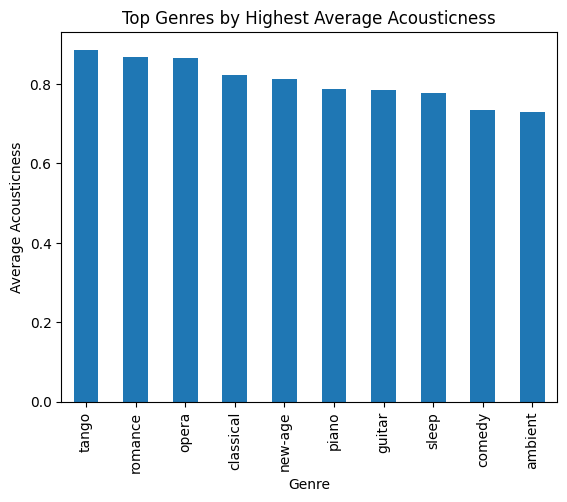

In [34]:
genre_avg_acousticness = data.groupby('genre')['acousticness'].mean()

top_genres = genre_avg_acousticness.sort_values(ascending=False).head(10)
top_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Acousticness')
plt.title('Top Genres by Highest Average Acousticness')
plt.show()

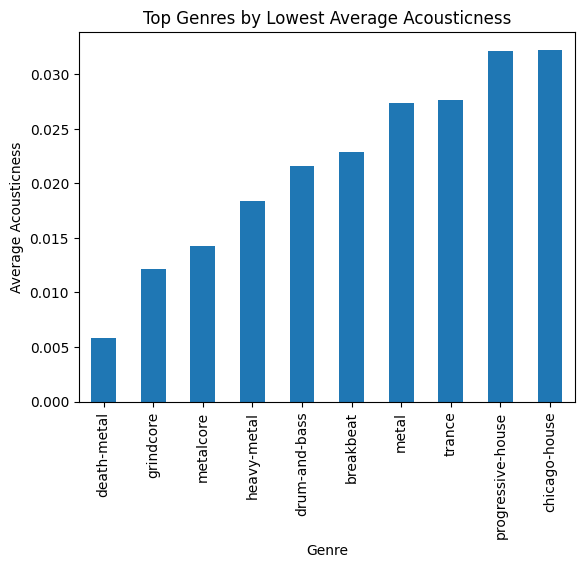

In [35]:
genre_avg_acousticness = data.groupby('genre')['acousticness'].mean()

top_genres = genre_avg_acousticness.sort_values(ascending=True).head(10)

top_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Acousticness')
plt.title('Top Genres by Lowest Average Acousticness')
plt.show()

## Top Genres by Speechness

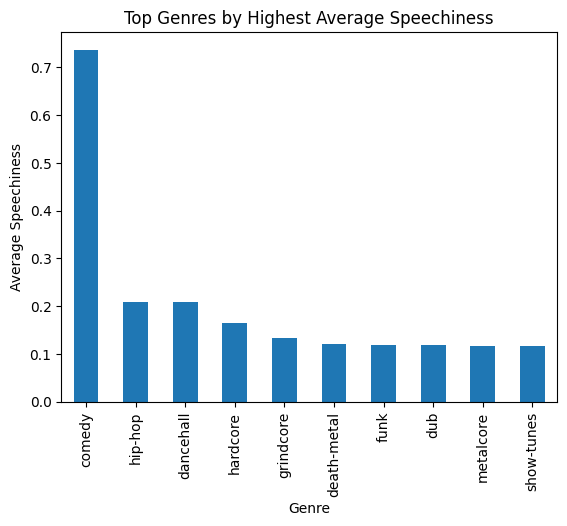

In [36]:
genre_avg_speechiness = data.groupby('genre')['speechiness'].mean()

top_genres = genre_avg_speechiness.sort_values(ascending=False).head(10)

top_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Speechiness')
plt.title('Top Genres by Highest Average Speechiness')
plt.show()

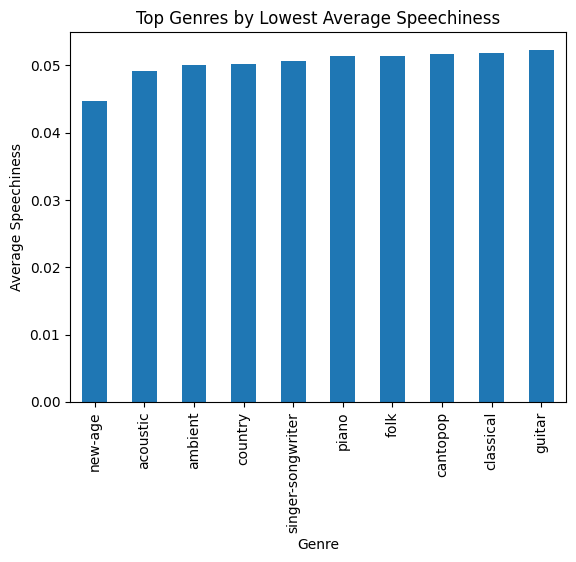

In [37]:
genre_avg_speechiness = data.groupby('genre')['speechiness'].mean()

top_genres = genre_avg_speechiness.sort_values(ascending=True).head(10)

top_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Speechiness')
plt.title('Top Genres by Lowest Average Speechiness')
plt.show()


## Top Genres by Loudness

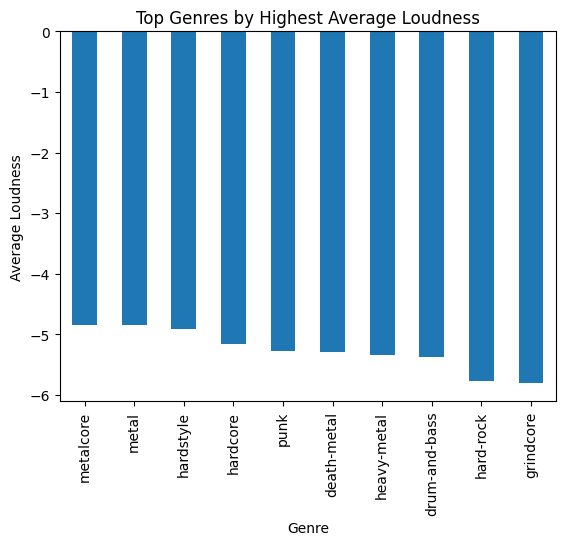

In [38]:
genre_avg_loudness = data.groupby('genre')['loudness'].mean()

top_genres = genre_avg_loudness.sort_values(ascending=False).head(10)

top_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Loudness')
plt.title('Top Genres by Highest Average Loudness')
plt.show()

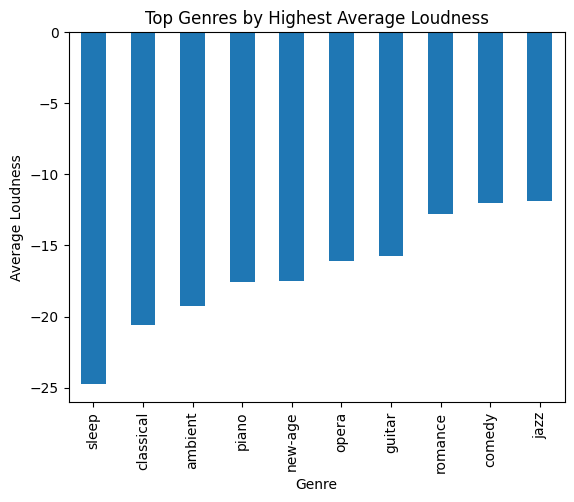

In [39]:
genre_avg_loudness = data.groupby('genre')['loudness'].mean()

top_genres = genre_avg_loudness.sort_values(ascending=True).head(10)

top_genres.plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Average Loudness')
plt.title('Top Genres by Highest Average Loudness')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from surprise import Dataset, Reader, KNNBasic
from surprise.model_selection import cross_validate

# Preprocessing
df = df.dropna()
df = pd.get_dummies(df, columns=['key', 'mode', 'time_signature'])
scaler = StandardScaler()
df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']] = scaler.fit_transform(df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']])

# Split the data
X = df.drop(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre'], axis=1)
y = df['genre']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a classifier
clf = RandomForestClassifier(n_estimators=5, random_state=42)
clf.fit(X_train, y_train)

# Evaluate the classifier
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


In [41]:
from sklearn.neighbors import NearestNeighbors

# Preprocess the data
df = df.dropna()
df = pd.get_dummies(df, columns=['key', 'mode', 'time_signature'])
scaler = StandardScaler()
df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']] = scaler.fit_transform(df[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']])

# Prepare data for the model
X = df.drop(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre'], axis=1).values

# Train the model
knn = NearestNeighbors(n_neighbors=5)
knn.fit(X)

# Function to recommend songs
def recommend_songs(song_name, df, model):
    song_features = df[df['track_name'] == song_name].drop(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre'], axis=1).values
    distances, indices = model.kneighbors(song_features)
    recommended_songs = df.iloc[indices[0]].track_name
    return recommended_songs

# Example usage
song_name = '93 Million Miles'
recommended_songs = recommend_songs(song_name, df, knn)
print(recommended_songs)

1                     93 Million Miles
845310     If She Were Any Other Woman
286133                       Lungdumtu
1108012                           专属味道
876131                          Around
Name: track_name, dtype: object


In [42]:
print(df['track_name'].unique())
print(recommend_songs('93 Million Miles', df, knn))

["I Won't Give Up" '93 Million Miles' 'Do Not Let Me Go' ...
 'Black Spirits' 'Morning Ms Candis' 'Hit the Road Jack (Pé Na Éstrada)']
1                     93 Million Miles
845310     If She Were Any Other Woman
286133                       Lungdumtu
1108012                           专属味道
876131                          Around
Name: track_name, dtype: object


In [44]:
def predict_and_recommend(song_features, df, clf, knn):
    song_features = song_features.reshape(1, -1)
    genre_pred = clf.predict(song_features)
    print(f'Predicted genre: {genre_pred[0]}')
    distances, indices = knn.kneighbors(song_features)
    recommended_songs = df.iloc[indices[0]].track_name
    print('Recommended songs:')
    print(recommended_songs)

In [ ]:
song_name = 'I Won\'t Give Up'  # replace this with the actual name of the song
song_features = df[df['track_name'] == song_name].drop(['Unnamed: 0', 'artist_name', 'track_name', 'track_id', 'popularity', 'year', 'genre'], axis=1).values[0]
predict_and_recommend(song_features, df, clf, knn)